In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.api as ts
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.api import qqplot

In [2]:
import os
os.getcwd()

'C:\\Users\\Gabriel\\Desktop\\analise_de_dados\\Series Temporais'

In [3]:
data = pd.read_excel ('teste2.xls')
data.head()

,Var1
0,400.780060
1,407.235554
2,415.237679
3,417.283586
4,415.173230


In [4]:
data.tail()

,Var1
195,597.530963
196,594.683502
197,587.196400
198,583.382851
199,580.289140


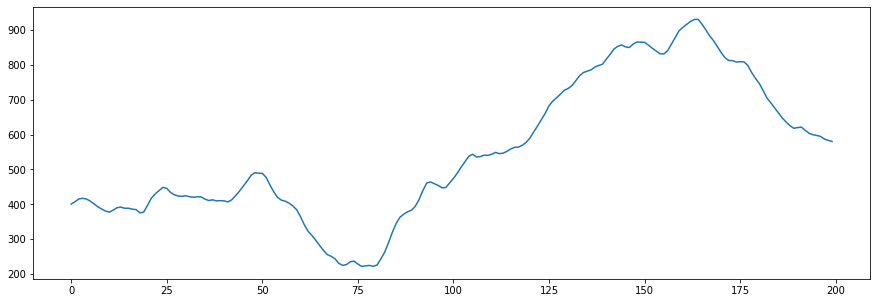

In [5]:
fig, axes = plt.subplots(figsize = (15, 5))
axes.plot(data['Var1'])

In [6]:
dif = lambda x, i: x[i] - x[i-1]
d_xt = [dif(data['Var1'], i) for i in range(1, len(data))]
data_dxt = pd.DataFrame(d_xt, columns=['Diferenca'])
data_dxt.head()

,Diferenca
0,6.455494
1,8.002126
2,2.045907
3,-2.110356
4,-5.819419


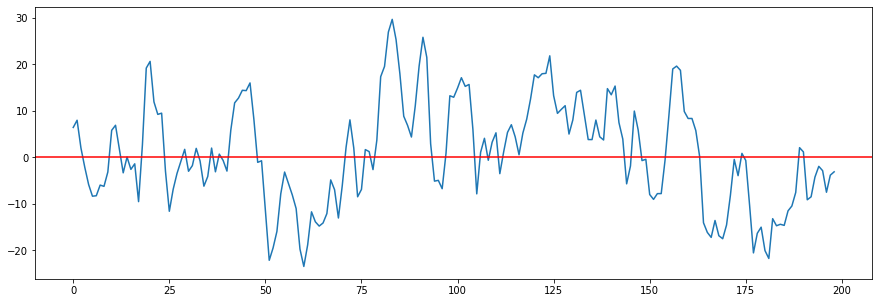

In [7]:
fig, axes = plt.subplots(figsize = (15, 5))
axes.plot(data_dxt['Diferenca'])
axes.axhline(y = 0, color = 'r')

In [8]:
ACF, q, pq = ts.acf(data_dxt['Diferenca'], qstat=True, fft = False)
PACF = ts.pacf(data_dxt['Diferenca'])
tabela = np.c_[range(1,41), ACF[1:], PACF[1:], q, pq]
tabela = pd.DataFrame(tabela, columns=['lag', "ACF", "PACF", "Q", "Prob(>Q)"])
tabela.head()

,lag,ACF,PACF,Q,Prob(>Q)
0,1.0,0.865267,0.869637,151.246210,9.259237e-35
1,2.0,0.662149,-0.358583,240.267577,6.707467e-53
2,3.0,0.512480,0.197311,293.865436,2.115515e-63
3,4.0,0.390520,-0.141341,325.147913,4.062020e-69
4,5.0,0.293982,0.076690,342.967181,5.716285e-72


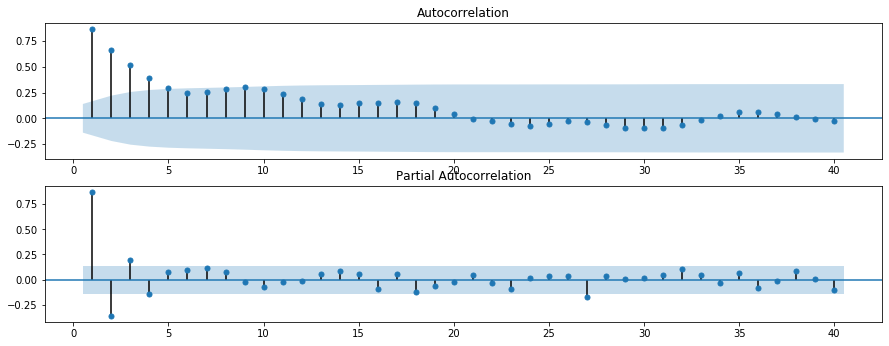

In [9]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,5.5))
fig = plot_acf(data_dxt['Diferenca'], lags=40, zero=False, ax=ax1)

fig = plot_pacf(data_dxt['Diferenca'], lags=40, zero=False, ax=ax2)

In [10]:
modelo = sm.tsa.ARMA(data_dxt, (1,1))
modelo = modelo.fit(trend = 'nc', method = "css")
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              Diferenca   No. Observations:                  199
Model:                     ARMA(1, 1)   Log Likelihood                -604.555
Method:                           css   S.D. of innovations              5.126
Date:                Sun, 16 Feb 2020   AIC                           1215.111
Time:                        23:43:23   BIC                           1224.975
Sample:                             1   HQIC                          1219.104
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
ar.L1.Diferenca     0.7618      0.050     15.148      0.000       0.663       0.860
ma.L1.Diferenca     0.5018      0.068      7.422      0.000       0.369       0.634
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3126           +0.0000j            1.3126            0.0000
MA.1           -1.9929           +0.0000j            1.9929            0.5000
-----------------------------------------------------------------------------
"""

In [11]:
sm.stats.durbin_watson(modelo.resid.values)

2.017743560801248

In [12]:
residuo = modelo.resid
residouquad = residuo**2
estimado = modelo.predict()
residuo = pd.DataFrame(residuo,  columns=['Residuos'])
residuo.head()

,Residuos
1,3.084109
2,-5.597956
3,-0.860012
4,-3.780134
5,-2.008247


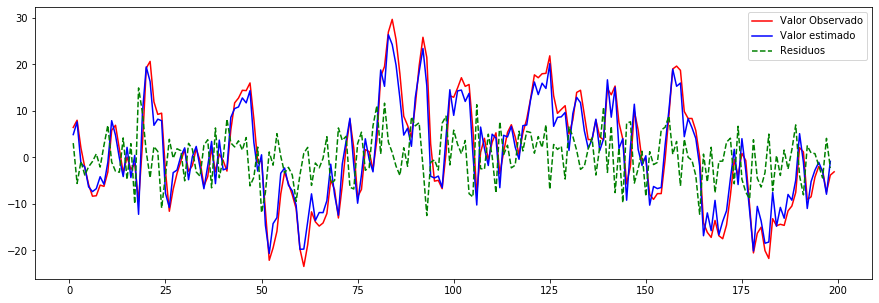

In [13]:
dif = len(data_dxt) - len(estimado)
x1 = range(dif, len(data_dxt))
x2 = range(1, len(data_dxt)+1)
fig, axes  =  plt.subplots(figsize = (15, 5))

axes.plot(x2, data_dxt['Diferenca'], 'r', label = 'Valor Observado') 
axes.plot(x1, estimado, 'b',  label = 'Valor estimado')

axes.plot(x1, residuo, 'g--', label = 'Residuos')
axes.legend()

In [14]:
ACF, q, pq = ts.acf(residuo, qstat=True, fft = False)
PACF = ts.pacf(residuo, method = 'ols')
tabela = np.c_[range(1,41), ACF[1:], PACF[1:], q, pq]
tabela = pd.DataFrame(tabela, columns=['lag', "ACF", "PACF", "Q", "Prob(Q>q)"])
tabela[0:10]

,lag,ACF,PACF,Q,Prob(Q>q)
0,1.0,-0.010724,-0.010729,0.023120,0.879146
1,2.0,-0.018201,-0.018341,0.090050,0.955974
2,3.0,0.032232,0.032223,0.301033,0.959834
3,4.0,0.030531,0.030916,0.491306,0.974342
4,5.0,-0.069907,-0.068875,1.494018,0.913759
5,6.0,-0.057326,-0.059268,2.171806,0.903239
6,7.0,-0.019142,-0.025494,2.247771,0.944864
7,8.0,0.063866,0.067654,3.097883,0.928065
8,9.0,0.123593,0.138596,6.298418,0.709720
9,10.0,0.051722,0.059647,6.861912,0.738414


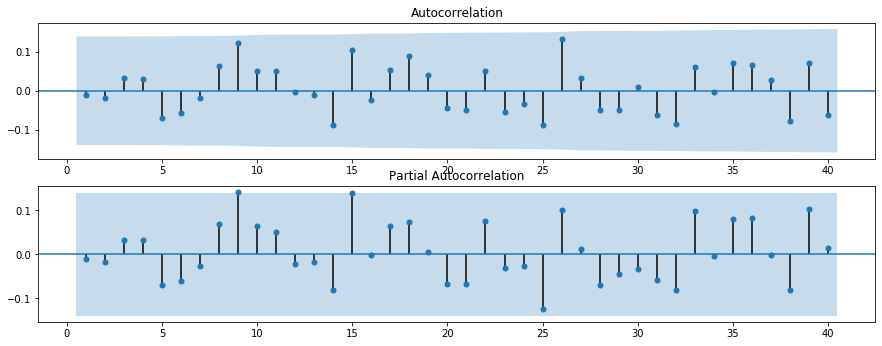

In [15]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,5.5))

fig = plot_acf(residuo, lags=40, zero=False, ax=ax1)
fig = plot_pacf(residuo, lags=40, zero=False, ax=ax2)

In [16]:
varerro = modelo.sigma2
residpad = residuo.values/np.sqrt(varerro)
residpad = pd.DataFrame(residpad,  columns=['Residuos Padronizados'])
n = len(residpad)
residpad.head()

,Residuos Padronizados
0,0.601633
1,-1.092021
2,-0.167767
3,-0.737410
4,-0.391759


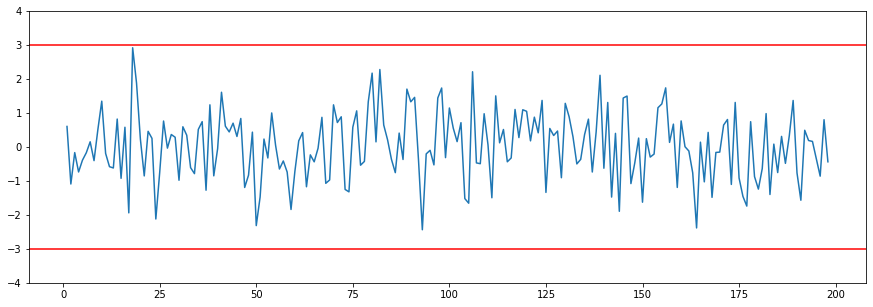

In [17]:
fig, axes = plt.subplots(figsize = (15, 5))
axes.plot(range(1, n + 1), residpad)
axes.set_ylim([-4, 4])
axes.axhline(y = 3, color = 'r')
axes.axhline(y = -3, color = 'r')

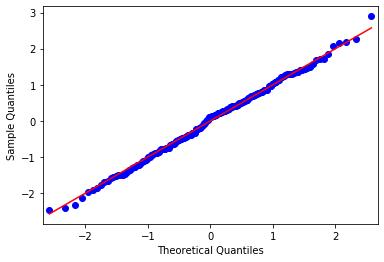

In [18]:
fig = sm.qqplot(residuo['Residuos'], scipy.stats.norm, fit=True, line='s')

(array([ 4., 12., 16., 29., 32., 40., 30., 22.,  8.,  4.,  1.]),
 array([-2.4385351 , -1.95157585, -1.46461661, -0.97765736, -0.49069811,
        -0.00373887,  0.48322038,  0.97017963,  1.45713887,  1.94409812,
         2.43105737,  2.91801661]),
 <a list of 11 Patch objects>)

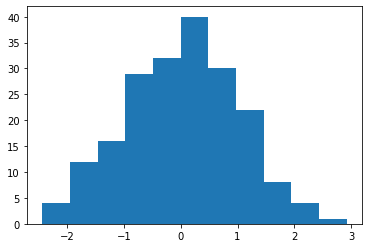

In [19]:
plt.hist(x = residpad['Residuos Padronizados'], bins = 'auto')

In [20]:
stat1, p1 = scipy.stats.shapiro(residpad['Residuos Padronizados'])
print(f'Estatistica de teste: {stat1}; \nP-valor: {p1}')

Estatistica de teste: 0.9961203336715698; 
P-valor: 0.899309515953064


In [21]:
stat2, p2 = scipy.stats.jarque_bera(residpad['Residuos Padronizados'])
print(f'Estatistica de teste: {stat2}; \nP-valor: {p2}')

Estatistica de teste: 0.5461185118882081; 
P-valor: 0.7610476896934262


In [22]:
stat, valor_critico, alpha = scipy.stats.anderson(residpad['Residuos Padronizados'], dist = 'norm')
print(f'Estatistica de teste: {stat}; \nValor Critico: {valor_critico}')

Estatistica de teste: 0.24033286722544744; 
Valor Critico: [0.565 0.643 0.772 0.9   1.071]
